<h1 align="center">Introduction to WordNet and Word semantics</h1> 

<h2>1. Distributional Semantics</h2>

Distributional semantics is a research area that develops and studies theories and methods for quantifying and categorizing semantic similarities between linguistic items based on their distributional properties in large samples of language data.<br>
The basic idea of distributional semantics can be summed up in the so-called Distributional hypothesis: linguistic items with similar distributions have similar meanings.

<h4>Distributional hypothesis</h4>

The distributional hypothesis in linguistics is derived from the semantic theory of language usage, i.e. words that are used and occur in the same contexts tend to purport similar meanings.<br>
The underlying idea that "a word is characterized by the company it keeps" was popularized by Firth.<br>
Although the Distributional Hypothesis originated in linguistics, it is now receiving attention in cognitive science especially regarding the context of word use.<br>
The distributional hypothesis suggests that the more semantically similar two words are, the more distributionally similar they will be in turn, and thus the more that they will tend to occur in similar linguistic contexts. <br>

<h4>Distributional semantic modeling</h4>

Distributional semantics favor the use of linear algebra as computational tool and representational framework. The basic approach is to collect distributional information in high-dimensional vectors, and to define distributional/semantic similarity in terms of vector similarity.

<h3>Similarity measures for binary vectors</h3>

Let X and Y denote the binary distributional vectors for words X and Y.

$$Dice Cofficient: \frac{2 \mid \vec{X} \cap \vec{Y} \mid}{\mid \vec{X} \mid + \mid \vec{Y} \mid}$$
$$Jaccard Cofficient: \frac{\mid \vec{X} \cap \vec{Y} \mid}{\mid \vec{X} \mid + \mid \vec{Y} \mid}$$
$$Overlap Cofficient: \frac{2 \mid \vec{X} \cup \vec{Y} \mid}{min( \mid \vec{X} \mid , \mid \vec{Y} \mid )}$$

$$Cosine Similarity: Cos( \vec{X} , \vec{Y} ) = \frac{\vec{X} \cdot \vec{Y} }{ \mid \vec{X} \mid \mid \vec{Y} \mid} 
$$

<b>How to get distributional vectors (X and Y)? - Word2Vec </b>

<h3>Word2Vec</h3>
- Word2vec is a group of related models that are used to produce word embeddings. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space.
- Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.
- Word2vec can utilize either of two model architectures to produce a distributed representation of words:
                - Continuous bag-of-words (CBOW) 
                - Continuous skip-gram.

<h4>1. CBOW</h4>

- In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

<h4>2. Skip Gram</h4>
- skip-grams are a generalization of n-grams in which the components (typically words) need not be consecutive in the text under consideration, but may leave gaps that are skipped over. They provide one way of overcoming the data sparsity problem found with conventional n-gram analysis.

<h3>Relational Similarity</h3>

- Two pairs (a,b) and (c,d) are said to be relationally similar if they have many similar relations. <br>
                Example- king:man and queen:woman
- Realtional semilarities can be exploited using vector arithmetic which is show in following example. Here we are performing vector addition of vectors of 'king' and 'woman' and subtacting 'queen' vector and the result we are getting is most similar to 'men'
- Read more on relational semantics and word analogy on
    https://levyomer.wordpress.com/2014/04/25/linguistic-regularities-in-sparse-and-explicit-word-representations/

In [1]:
#Example showing vector arithmetic to exploit word similarities
#sentences dataset taken from: https://code.google.com/archive/p/word2vec/source/default/source
#Precomputed vectors data taken from: https://code.google.com/archive/p/word2vec/
from scipy import spatial
import numpy as np
dictionary = dict()
with open("Data/IntroductiontoWordNetandWordsemantics/extracted_vectors.txt","r") as f: #sentences is the data set we have used
    for line in f:
        temp = line.strip("\n").split(",")
        vector = temp[1].split(";")
        vector = [float(i) for i in vector]
        dictionary[temp[0]] = vector
king = np.asarray(dictionary['king'])
queen = np.asarray(dictionary['queen'])
man = dictionary['man']
woman = dictionary['woman']

#simiarity between (vector(king)-vector(man)) and (vector(queen)-vector(woman))
similarity = 1 - spatial.distance.cosine(king-man,queen-woman)
print 'Similarity: '
print similarity

#similarly you can provide---
#hot + weak - cold = strong
#France + Athens - Paris = Greece/Greek

Similarity: 
0.758035028102


- In the following code snippet, we are showing euclidean distance of 'king' with 'queen','man', and 'woman'.
- The resultant graph shows that since the euclidean distance of 'king' and 'queen' is less,thus 'king' is more closely related to 'queen' than 'man' and at last 'woman', taking vectors of these words mentioned above in notebook.

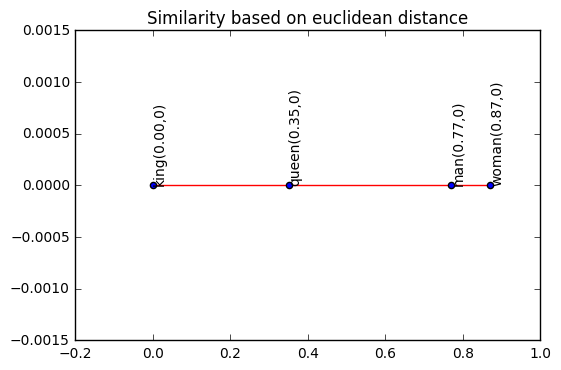

In [2]:
#Graph plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.title('Similarity based on euclidean distance')
ax = fig.add_subplot(111)
x = []
y = []
z = []
y = [0,0,0,0]
z.append(['king','%.2f'%spatial.distance.cosine(king,king)])
z.append(['queen','%.2f'%spatial.distance.cosine(king,queen)])
z.append(['man','%.2f'%spatial.distance.cosine(king,man)])
z.append(['woman','%.2f'%spatial.distance.cosine(king,woman)])

z.sort(key=lambda x: x[1])
x = [i[1] for i in z]
myvec = np.array([x,y])
plt.plot(myvec[0,],myvec[1,],'r',zorder=1)
plt.scatter(x,y,zorder=2)
i = 0
for xy in zip(x, y):    
    ax.annotate(z[i][0]+'(%s,%s)' % xy, xy=xy, textcoords='data',rotation=90,va='bottom')
    i = i+1
plt.show()

<h2>2. WordNet :</h2>

WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations. The resulting network of meaningfully related words and concepts can be navigated with the browser.WordNet's structure makes it a useful tool for computational linguistics and natural language processing.

WordNet superficially resembles a thesaurus, in that it groups words together based on their meanings. However, there are some important distinctions. First, WordNet interlinks not just word forms—strings of letters—but specific senses of words. As a result, words that are found in close proximity to one another in the network are semantically disambiguated. Second, WordNet labels the semantic relations among words, whereas the groupings of words in a thesaurus does not follow any explicit pattern other than meaning similarity.

<h4>Application of wordnet :</h4>

WordNet has been used for a number of different purposes in information systems, including word-sense disambiguation, information retrieval, automatic text classification, automatic text summarization, machine translation and even automatic crossword puzzle generation.

A common use of WordNet is to determine the similarity between words. Various algorithms have been proposed, and these include measuring the distance among the words and synsets in WordNet's graph structure, such as by counting the number of edges among synsets. The intuition is that the closer two words or synsets are, the closer their meaning. A number of WordNet-based word similarity algorithms are implemented in a Perl package called WordNet::Similarity and in a Python package called NLTK. Other more sophisticated WordNet-based similarity techniques include ADW, whose implementation is available in Java. WordNet can also be used to inter-link other vocabularies.

<h5>Downloading WordNet</h5>
- You can download wordNet corpus from nltk. Run form python terminal
                            - import nltk
                            - nltk.download()
  and from the dialog-box, download 'wordnet' corpus.

<h5>Synonyms of a word</h5>

In [3]:
#Example showing synonyms
import nltk
from nltk.corpus import wordnet
from nltk.corpus import wordnet_ic
syns = wordnet.synsets("good")

for syn in syns:
    print(syn)

Synset('good.n.01')
Synset('good.n.02')
Synset('good.n.03')
Synset('commodity.n.01')
Synset('good.a.01')
Synset('full.s.06')
Synset('good.a.03')
Synset('estimable.s.02')
Synset('beneficial.s.01')
Synset('good.s.06')
Synset('good.s.07')
Synset('adept.s.01')
Synset('good.s.09')
Synset('dear.s.02')
Synset('dependable.s.04')
Synset('good.s.12')
Synset('good.s.13')
Synset('effective.s.04')
Synset('good.s.15')
Synset('good.s.16')
Synset('good.s.17')
Synset('good.s.18')
Synset('good.s.19')
Synset('good.s.20')
Synset('good.s.21')
Synset('well.r.01')
Synset('thoroughly.r.02')


In [4]:
#In order to print just first synonym
print "Just the first synonym : " , syns[0]
print "Only the name : " , syns[0].lemmas()[0].name()
print "\n"

#In order to print the definition:
print ("Definition:")
print (syns[0].definition())
print "\n"

#In order to print the examples:
print "Examples:"
print syns[0].examples()

Just the first synonym :  Synset('good.n.01')
Only the name :  good


Definition:
benefit


Examples:
[u'for your own good', u"what's the good of worrying?"]


<h5>A compiled example : </h5>

- Install wordcloud, ipywidgets and matplotlib:
                    pip install wordcloud
                    pip install ipywidgets
                    pip install matplotlib

synonyms : 


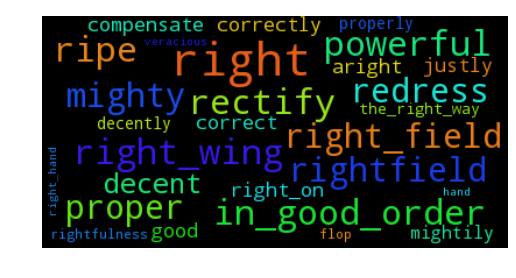

antonyms : 


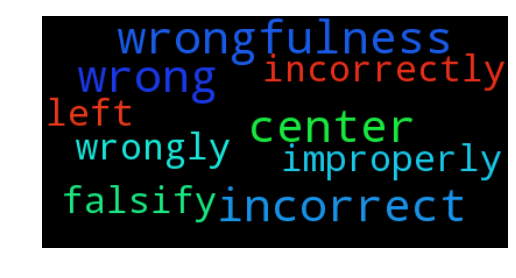

In [5]:
#Example showing synonyms and antonyms
from IPython.display import display, clear_output
from ipywidgets import widgets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#show plot inline instead of new window
%matplotlib inline

#show text input widget
print("Enter word : ")
text = widgets.Text(value="right")
display(text)

def text_handler(sender):
    ''' on input find synonyms and antonyms and plot it. '''
    
    #clear the output
    clear_output()
    
    synonyms = []
    antonyms = []

    #find synonyms and antonyms
    for syn in wordnet.synsets(text.value):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if (l.antonyms()):
                antonyms.append(l.antonyms()[0].name())
               
    #plot synonyms
    if len(synonyms)==0:
        print("No synonyms found.")
    else:
        print("synonyms : ")
        wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(list(set(synonyms))))
        plt.figure()
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

    #plot antonyms
    if len(antonyms)==0:
        print("No antonyms found.")
    else:
        print("antonyms : ")
        wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(list(set(antonyms))))
        plt.figure()
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

#plot default value
text_handler(None)

#register handler for text input
text.on_submit(text_handler)

<h5>Similarity between words : </h5>

In [6]:
w1=wordnet.synset("boat.n.01")
w2=wordnet.synset("ship.n.01")
print ("Similarity between boat and sheep", w1.wup_similarity(w2))

w1=wordnet.synset("boat.n.01")
w2=wordnet.synset("cat.n.01")
print ("Similarity between boat and cat", w1.wup_similarity(w2))

w1=wordnet.synset("boat.n.01")
w2=wordnet.synset("car.n.01")
print ("Similarity between boat and car", w1.wup_similarity(w2))

('Similarity between boat and sheep', 0.9090909090909091)
('Similarity between boat and cat', 0.32)
('Similarity between boat and car', 0.6956521739130435)


<h4>Finding similarity between any two words:</h4>

In [7]:
text1 = widgets.Text(value="boat")
display(text1)

text2 = widgets.Text(value="ship")
display(text2)

def text_handler(sender):
    ''' on input find print wup similarity. '''
    
    #clear the output
    clear_output()
    
    try:
        word1 = wordnet.synsets(text1.value)[0]
        word2 = wordnet.synsets(text2.value)[0]
        print("Similarity : ",word1.wup_similarity(word2))
    except:
        print("Word not found")

#register handler for text input
text1.on_submit(text_handler)
text2.on_submit(text_handler)

#similarity of default value
text_handler(None)

('Similarity : ', 0.9090909090909091)


<h3>Lowest Common Hypernym/Ancestors/Subsummer</h3>
- Least Common Subsumer of two concepts A and B is "the most specific concept which is an ancestor of both A and B", where the concept tree is defined by the is-a relation. 
- Below snippet explains the concept. As you can see "policeman" and "firefighter" shares the least common hypernym "defender"
- Still don't get the idea? Try out any two words of your choice and paly around with it.

In [8]:
print "Lowest Common Ancestor of 'Policeman' and 'Firefighter':"
print wordnet.synset('policeman.n.01').lowest_common_hypernyms(wordnet.synset('firefighter.n.01'))[0].name()
print '\n'
print "Hypernym path to root for  policeman:"
j = 0
for i in wordnet.synset('policeman.n.01').hypernym_paths()[0]:
    print " "*j*2, i.name()
    j = j + 1
print '\n'
print "Hypernym path to root for  firefighter:"
for i in wordnet.synset('firefighter.n.01').hypernym_paths()[0]:
    print " "*j*2, i.name()
    j = j + 1
    

Lowest Common Ancestor of 'Policeman' and 'Firefighter':
defender.n.01


Hypernym path to root for  policeman:
 entity.n.01
   physical_entity.n.01
     causal_agent.n.01
       person.n.01
         preserver.n.03
           defender.n.01
             lawman.n.01
               policeman.n.01


Hypernym path to root for  firefighter:
                 entity.n.01
                   physical_entity.n.01
                     causal_agent.n.01
                       person.n.01
                         preserver.n.03
                           defender.n.01
                             fireman.n.04


<h3>Concept Probability Models</h3>
- For each concept(synset) c, let P(c) be the probability that a randomly selected word in a corpus is an instance (hyponym) of c.
- P(ROOT) = 1
- The lower the node in the hierarchy, the lower its probability.
- Information content, 
             IC(c)=-logp(c)

<h4>1.Resnik Similarity</h4>
 - Measures the commonality between the words by the information content of lowest common subsumer.

<h4>2.Lin Similarity</h4>
 - The more information content the words don't share, the less similar they are.

<h4>3.Jiang-Conrath Similarity</h4>
 - We use information content to assign lengths to grsaph edges.
 
 
Note: For the following code snippet, download "wordnet_ic" from nltk

In [9]:
#Download wordnet_ic from wordnet
brown_ic = wordnet_ic.ic('ic-brown.dat')
dog = wordnet.synset('dog.n.01')
cat = wordnet.synset('cat.n.01')
print dog.res_similarity(cat, brown_ic) #resnik similarity between cat and dog
print dog.jcn_similarity(cat, brown_ic) #jiang similarity
print dog.lin_similarity(cat, brown_ic) #lin similarity

7.91166650904
0.449775528552
0.876800984373


<h2>3. Lexical Semantics</h2>
- Lexical semantics is concerned with the systematic meaning related connections among lexical items, and the internal meaning-related structure of individual lexical items.
- To identify the semantics of lexical items, we need to focus on the notion of lexeme , an individual entry in the lexicon.

<h3>Realtions between Word Meanings</h3>
        - Synonymy
        - Antonymy
        - Hyponymy
        - Hypernymy
        and many more.

<h4>Hypernyms and Hyponyms</h4>
- Hyponym shares a type-of relationship with its hypernym. 
- For example, pigeon, crow, eagle and seagull are all hyponyms of bird (their hypernym); which, in turn, is a hyponym of animal.
- Example explains more.

http://www.nltk.org/howto/wordnet.html

In [10]:
car = wordnet.synset('car.n.01')
print "Hyponyms of car:"
for i in car.hyponyms():
        print i.lemmas()[0].name()
#print car.hyponyms()[0].lemmas()[0].name()
print '\n'
print "Hypernyms of car:"
for i in car.hypernyms():
        print i.lemmas()[0].name()
#print car.hypernyms()[0].lemmas()[0].name()

Hyponyms of car:
ambulance
beach_wagon
bus
cab
compact
convertible
coupe
cruiser
electric
gas_guzzler
hardtop
hatchback
horseless_carriage
hot_rod
jeep
limousine
loaner
minicar
minivan
Model_T
pace_car
racer
roadster
sedan
sport_utility
sports_car
Stanley_Steamer
stock_car
subcompact
touring_car
used-car


Hypernyms of car:
motor_vehicle


<h2>4. Word Sense Disambiguation</h2>
- Word-Sense Disambiguation (WSD) is an open problem of natural language processing and ontology. WSD is identifying which sense of a word (i.e. meaning) is used in a sentence, when the word has multiple meanings.
- To date, a rich variety of techniques have been researched, from dictionary-based methods that use the knowledge encoded in lexical resources, to supervised machine learning methods in which a classifier is trained for each distinct word on a corpus of manually sense-annotated examples, to completely unsupervised methods that cluster occurrences of words, thereby inducing word senses. 
- nltk provies lesk algorithm for WSD, use of which is explained in the following code snippet:

In [11]:
#http://stackoverflow.com/questions/3699810/word-sense-disambiguation-in-nltk-python
from nltk.wsd import lesk
sent = 'I went to the bank to deposit my money'
ambiguous = 'bank'
print "Sense of'", ambiguous, "'in current context:"
print lesk(sent, ambiguous).definition()

Sense of' bank 'in current context:
a container (usually with a slot in the top) for keeping money at home


- As you can see in the previous example, built-in lesk algorithm fails to identify correct sense of the word. There are many better lesk implementations available that you can use.

<h3>A better WSD</h3>
- 'lesk' implementation provided by pywsd gives much better results than the nltk version.
- You can download and install it from : https://github.com/alvations/pywsd 
- Instructions for installing it will be there in the '.yml' file. Please make sure the you have installed all the dependencies as specified in the '.yml' file
- Still getting errors? Make sure that you have downloaded
         - 'stopwords' corpus
         -  averaged_perception_tagger 
  from nltk.download(). (These requirements are already specified in the dependencies for pywsd)

In [12]:
#https://github.com/alvations/pywsd
#install stopwords from nltk.download()
#install ageraged_perception_tagger for nltk.download()
from pywsd.lesk import simple_lesk
sent = 'I went to the bank to deposit my money'
ambiguous = 'bank'
answer = simple_lesk(sent, ambiguous, pos='n')

print "Sense of '",ambiguous,"' in current context:"
print answer.definition()

Sense of ' bank ' in current context:
a building in which the business of banking transacted
